<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 2: Practica 1
Que veremos:

1. Polinomio de Taylor y el calculo de su resto
2. acotar el error "a mano" y usando python
3. ploteamos funciones y distintos polinomios
4. Hallar n para lograr un error menor a algo.



In [ ]:
import numpy as np #paquete para manejar arreglos
from matplotlib import pyplot as plt #para graficar

plt.rcParams["figure.figsize"] = (20,7) #tamaño de los gráficos: ancho x alto

# Calcular un polinomio de Taylor y graficarlo junto con la función

## Objetivo: graficar $\cos(x)$ y pol. Taylor con $x_0 = 1$ entre -4 y 7, para órdenes 1, 2 y 3.

In [ ]:
def func(x):
  y = np.cos(x)
  return y

# defino pols de taylor
def taylor1(x):
    y = np.cos(1) - np.sin(1)*(x-1)
    return y

def taylor2(x):
    y = np.cos(1) - np.sin(1)*(x-1) - (np.cos(1)/2) * (x-1)**2
    return y

def taylor3(x):
    y = np.cos(1) - np.sin(1)*(x-1) - (np.cos(1)/2) * (x-1)**2 + (np.sin(1)/np.math.factorial(3))*(x-1)**3
    #otra forma
    # y = taylor2(x) - (np.cos(1)/np.math.factorial(3))*(x-1)**3
    return y



In [ ]:
print("usando el Taylor de orden 3 tenenmos cos(1.1) es aprox: ", taylor3(1.1))
print("usando python para calcular cos(1.1)", np.cos(1.1))

usando el Taylor de orden 3 tenenmos cos(1.1) es aprox:  0.45359394102214395
usando python para calcular cos(1.1) 0.4535961214255773


In [ ]:
# np.math.factorial(3) #factorial


In [ ]:


valores_x = np.linspace(-5,7,10000)
valores_y = func(valores_x)
valores_taylor1 = taylor1(valores_x)
valores_taylor2 = taylor2(valores_x)
valores_taylor3 = taylor3(valores_x)

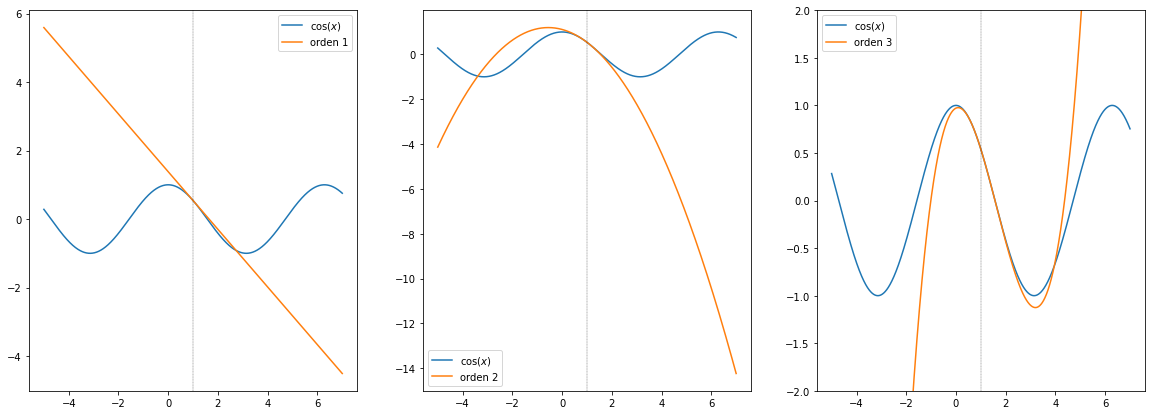

In [ ]:
plt.subplot(131)
plt.plot(valores_x, valores_y, label="$\cos(x)$") #función cos(x)
plt.plot(valores_x, valores_taylor1, label="orden 1") #taylor órden 1
plt.axvline(x = 1, linestyle = 'dashed', linewidth = 0.3, color = "black")
plt.legend() #muestra las etiquetas

plt.subplot(132)
plt.plot(valores_x, valores_y, label="$\cos(x)$") #función cos(x)
plt.plot(valores_x, valores_taylor2, label="orden 2") #taylor órden 2
plt.axvline(x = 1, linestyle = 'dashed', linewidth = 0.3, color = "black")
plt.legend()

plt.subplot(133)
plt.plot(valores_x, valores_y, label="$\cos(x)$") #función cos(x)
plt.plot(valores_x, valores_taylor3, label="orden 3") #taylor órden 3
plt.axvline(x = 1, linestyle = 'dashed', linewidth = 0.3, color = "black")
plt.legend()
plt.ylim(-2,2)
plt.show()


# Chequear errores

## Objetivo: aproximar cos(1.1) con distintos órdenes y ver el error que se está cometiendo.

In [ ]:
a = 1.1
print(np.cos(a)) 
print(taylor1(a)) #aprox a orden 1
print(taylor2(a)) #aprox a orden 2
print(taylor3(a)) #aprox a orden 3

print("-------------------------------------")
print("error orden 1: ", np.abs(taylor1(a) - func(a)))
print("error orden 2: ", np.abs(taylor2(a) - func(a)))
print("error orden 3: ", np.abs(taylor2(a) - func(a)))

0.4535961214255773
0.45615520738735005
0.4534536958580093
0.45359394102214395
-------------------------------------
error orden 1:  0.0025590859617727335
error orden 2:  0.00014242556756799418
error orden 3:  0.00014242556756799418


# Averiguar el orden para que el error sea menor a uno deseado
## Objetivo: acotar el error del pol. Taylor para cos(x) con $x_0 = 1$, y encontrar el órden para asegurar error menor a cierto valor.

In [ ]:
# primero hacer a mano. Recordar que el objetivo es aproximar sen(1.1)

def cota_error_taylor(n):
    error = (0.1)**(n+1) / np.math.factorial(n+1)
    return error



Si queremos hallar el $n$ para que el error sea menor que $10^{-6}$ lo podemos hacer con un while:

In [ ]:
err = 1e-6  #10^-6
n = 1
while cota_error_taylor(n) > err:
    n = n + 1

print(n)

4


La funcion math.factorial de numpy solo calcula factorial de un escalar (entero). Tenenmos otra funcion que calcula el factorial de un vector (coordenanda a coordenada). Para esto importamos esta funcion de la libreria scipy

***from scipy.special import factorial ***

In [ ]:
from scipy.special import factorial
def cota_err(n):
    error = (0.1)**(n+1) / factorial(n+1)
    return error


In [ ]:
N = np.array(range(1,10))
cota_err(N)


array([5.00000000e-03, 1.66666667e-04, 4.16666667e-06, 8.33333333e-08,
       1.38888889e-09, 1.98412698e-11, 2.48015873e-13, 2.75573192e-15,
       2.75573192e-17])

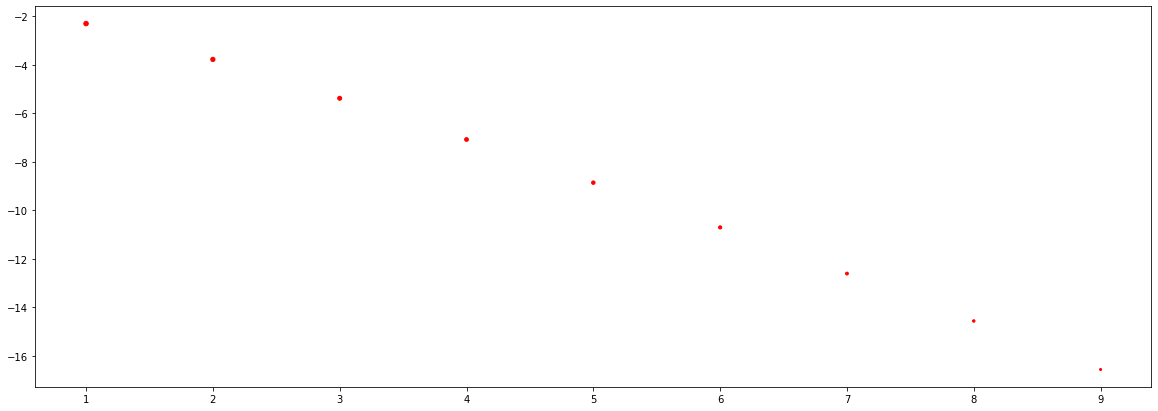

In [ ]:
plt.scatter(N, np.log10(cota_err(N)), s = range(20, 2, -2), color = "r")
plt.show()

In [ ]:
np.arange(20, 10,-1)

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11])

Veamos que en este caso podemos dar una expresion general del resto de Taylor:$R_n(x)$

In [ ]:
#@title
#definamos la derviada de orden k de f:
def der_f(k, x):

    if k%2 == 0:
      f_k = (-1)**(k/2 +2)*np.cos(x)
    else:
      f_k = (-1)**((k+1)/2)*np.sin(x)

    return f_k


def Resto_taylor(n, a, y):
    
    R = der_f(n+1, y)/(np.math.factorial(n+1))*(a - 1)**(n+1) 

    return R



In [ ]:
#@title
y = np.linspace(1,1.1, 30)
R = Resto_taylor(2, 1.1, y)

plt.plot(y, (np.abs(R)), linestyle = 'dashed', color = 'black')
plt.plot(y, (np.abs(np.sin(y)/6*(0.1)**3)), color = 'yellow')

In [ ]:
#@title
y = np.linspace(1,1.1, 30)
a = 1.1
for n in range(2, 5):
    R = np.abs(Resto_taylor(n, a, y))
    plt.figure(figsize=(8,6))
    plt.plot(y, (R), label = "Resto de orden "+str(n))
    plt.legend()
    plt.ylim(np.min(R), np.max(R))

# Ejercicio
##- Graficar $e^x$ entre -3 y 2
##- Graficar los pols. de Taylor de órdenes 1, 2 y 3 con $x_0=0$ junto a la función
##- Aproximar $e^{0.2}$ y ver el error que se está cometiendo para cada órden.
##- Acotar el error de Taylor y encontrar el órden para que el error sea menor a $10^{-10}$